# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [8]:
# Output File (CSV)
output_data_file = "../output_data/cities.csv"
#city_data = pd.read_csv(output_data_file)
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#city_data

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



600

In [10]:
cities

['bluff',
 'miramar',
 'port alfred',
 'belciugatele',
 'nemuro',
 'geraldton',
 'kapaa',
 'ustyuzhna',
 'hirado',
 'new norfolk',
 'mrirt',
 'hami',
 'yellowknife',
 'ndele',
 'rikitea',
 'gazojak',
 'ciudad bolivar',
 'kautokeino',
 'atuona',
 'parabel',
 'carnarvon',
 'kattivakkam',
 'vaini',
 'bredasdorp',
 'nanortalik',
 'saint george',
 'muzhi',
 'kodiak',
 'ribeira grande',
 'busselton',
 'bam',
 'aborlan',
 'olafsvik',
 'grindavik',
 'bairiki',
 'mandiana',
 'ushuaia',
 'faanui',
 'punta arenas',
 'abu samrah',
 'ndende',
 'saint anthony',
 'kieta',
 'cockburn town',
 'nanchang',
 'kholodnyy',
 'san juan',
 'jacqueville',
 'nikolskoye',
 'kloulklubed',
 'lasa',
 'puerto ayora',
 'saint-philippe',
 'acapulco',
 'hambantota',
 'ternate',
 'mataura',
 'portmore',
 'coffs harbour',
 'lorengau',
 'qaanaaq',
 'hermanus',
 'coihaique',
 'vila',
 'pisco',
 'kulachi',
 'college',
 'mar del plata',
 'balkanabat',
 'tasiilaq',
 'mys shmidta',
 'albany',
 'ballina',
 'port elizabeth',
 'ho

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
sample_city = ["ostrovnoy","zhuhai","Hars", "New York","new norfolk"]
#cities = []
#response = requests.get(query_url + "Paris").json()


# set up lists to hold reponse info
lat = []
lon = []
max_temp = []
humidity = []
cloud = []
wind_speed = []
city_name = []
country =[]
date =[]

city_id = 1


# Loop through the list of cities and perform a request for data on each
for city in cities:
#for city in sample_city: 
    response = requests.get(query_url + city).json()
    
    try:
        lat.append(response['coord']['lat'])
        lon.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing {city_id} - {city} found")
        print("----------")
        city_id += 1
#response
        #print(json.dumps(response, indent=4, sort_keys=False))
    
    except:
        print(f"{city} not found, skipping")
        print("------------")
        pass
        

Processing 1 - bluff found
----------
Processing 2 - miramar found
----------
Processing 3 - port alfred found
----------
Processing 4 - belciugatele found
----------
Processing 5 - nemuro found
----------
Processing 6 - geraldton found
----------
Processing 7 - kapaa found
----------
Processing 8 - ustyuzhna found
----------
Processing 9 - hirado found
----------
Processing 10 - new norfolk found
----------
mrirt not found, skipping
------------
Processing 11 - hami found
----------
Processing 12 - yellowknife found
----------
Processing 13 - ndele found
----------
Processing 14 - rikitea found
----------
Processing 15 - gazojak found
----------
Processing 16 - ciudad bolivar found
----------
Processing 17 - kautokeino found
----------
Processing 18 - atuona found
----------
Processing 19 - parabel found
----------
Processing 20 - carnarvon found
----------
Processing 21 - kattivakkam found
----------
Processing 22 - vaini found
----------
Processing 23 - bredasdorp found
----------
P

Processing 176 - the pas found
----------
Processing 177 - poum found
----------
Processing 178 - njeru found
----------
Processing 179 - capela found
----------
Processing 180 - marsh harbour found
----------
Processing 181 - presidencia roque saenz pena found
----------
Processing 182 - namatanai found
----------
Processing 183 - port hardy found
----------
Processing 184 - san quintin found
----------
Processing 185 - vila franca do campo found
----------
Processing 186 - salaga found
----------
sentyabrskiy not found, skipping
------------
Processing 187 - mangai found
----------
grand river south east not found, skipping
------------
Processing 188 - shimoda found
----------
Processing 189 - knyaze-volkonskoye found
----------
Processing 190 - dezhou found
----------
Processing 191 - whitley bay found
----------
Processing 192 - minot found
----------
Processing 193 - jumla found
----------
Processing 194 - yei found
----------
Processing 195 - lang suan found
----------
Processin

Processing 352 - luau found
----------
Processing 353 - poya found
----------
Processing 354 - hervey bay found
----------
Processing 355 - iskateley found
----------
Processing 356 - faxinal found
----------
Processing 357 - palu found
----------
Processing 358 - esperance found
----------
Processing 359 - tarko-sale found
----------
Processing 360 - karlskrona found
----------
Processing 361 - yerbogachen found
----------
Processing 362 - guhagar found
----------
Processing 363 - rocha found
----------
Processing 364 - batsfjord found
----------
Processing 365 - faro found
----------
Processing 366 - dobryanka found
----------
Processing 367 - eagle pass found
----------
Processing 368 - galesong found
----------
Processing 369 - sawakin found
----------
Processing 370 - naron found
----------
Processing 371 - korem found
----------
Processing 372 - simao found
----------
Processing 373 - katobu found
----------
Processing 374 - newport found
----------
Processing 375 - hovd found
--

Processing 529 - codajas found
----------
Processing 530 - goderich found
----------
Processing 531 - korampallam found
----------
Processing 532 - verkhoyansk found
----------
Processing 533 - toguchin found
----------
barawe not found, skipping
------------
Processing 534 - barcelos found
----------
hihifo not found, skipping
------------
Processing 535 - yenangyaung found
----------
Processing 536 - berezovyy found
----------
Processing 537 - mirnyy found
----------
Processing 538 - omboue found
----------
Processing 539 - mumbwa found
----------
halalo not found, skipping
------------
Processing 540 - moerai found
----------
Processing 541 - qaqortoq found
----------
Processing 542 - sena madureira found
----------
pravec not found, skipping
------------
Processing 543 - atherton found
----------
Processing 544 - alta found
----------
Processing 545 - ulaanbaatar found
----------
Processing 546 - preobrazheniye found
----------
Processing 547 - tyrma found
----------
viligili not f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [36]:
#api dataframe
city_data = pd.DataFrame({
    "City":city_name,
    "Country":country,
    "Max Temp": max_temp,
    "Date":date,
   "Cloudiness":cloud,
   "Lat":lat,
    "Lng":lon,
    "Wind Speed": wind_speed,
    "Humidity":humidity})

city_data

,City,Country,Max Temp,Date,Cloudiness,Lat,Lng,Wind Speed,Humidity
0,Bluff,NZ,278.71,1619371975,79,-46.6000,168.3333,2.68,84
1,Miramar,US,305.93,1619371976,75,25.9873,-80.2323,4.63,51
2,Port Alfred,ZA,294.62,1619371976,98,-33.5906,26.8910,6.88,71
3,Belciugatele,RO,289.26,1619371977,70,44.4833,26.4333,0.45,40
4,Nemuro,JP,273.39,1619371969,37,43.3236,145.5750,9.05,68
...,...,...,...,...,...,...,...,...,...
544,Ulaanbaatar,MN,273.15,1619372128,75,47.9077,106.8832,4.00,80
545,Preobrazheniye,RU,275.24,1619372128,0,42.9019,133.9064,1.66,52
546,Tyrma,RU,271.78,1619372129,59,50.0833,132.1667,1.12,47
547,Conceição da Barra,BR,300.41,1619372129,40,-18.5933,-39.7322,4.18,71


In [13]:
city_data.to_csv("WeatherPy.csv",encoding="utf-8",index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,City,Country,Max Temp,Date,Cloudiness,Lat,Lng,Wind Speed,Humidity


In [35]:
clean_city_data = city_data.loc[city_data["Humidity"] < 100]
clean_city_data

,City,Country,Max Temp,Date,Cloudiness,Lat,Lng,Wind Speed,Humidity
0,Bluff,NZ,278.71,1619371975,79,-46.6000,168.3333,2.68,84
1,Miramar,US,305.93,1619371976,75,25.9873,-80.2323,4.63,51
2,Port Alfred,ZA,294.62,1619371976,98,-33.5906,26.8910,6.88,71
3,Belciugatele,RO,289.26,1619371977,70,44.4833,26.4333,0.45,40
4,Nemuro,JP,273.39,1619371969,37,43.3236,145.5750,9.05,68
...,...,...,...,...,...,...,...,...,...
544,Ulaanbaatar,MN,273.15,1619372128,75,47.9077,106.8832,4.00,80
545,Preobrazheniye,RU,275.24,1619372128,0,42.9019,133.9064,1.66,52
546,Tyrma,RU,271.78,1619372129,59,50.0833,132.1667,1.12,47
547,Conceição da Barra,BR,300.41,1619372129,40,-18.5933,-39.7322,4.18,71


In [16]:
#  Get the indices of cities that have humidity over 100%.


In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

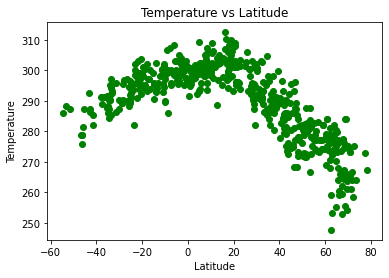

In [19]:
#Temp vs Lat   #change df name

plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"], marker="o", color="green")
plt.title("Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig('../Untitled Folder/temp_lat.png')
plt.show()


## Latitude vs. Humidity Plot

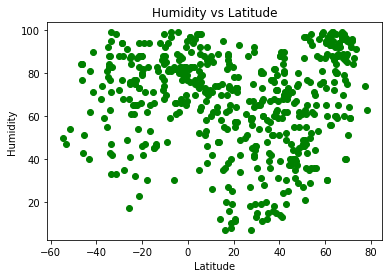

In [20]:
#Humidity vs Lat #change df name

plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"], marker="o", color="green")
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig('../Untitled Folder/hum_lat.png')
plt.show()

## Latitude vs. Cloudiness Plot

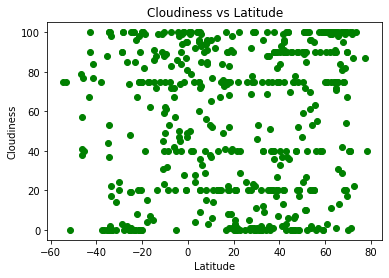

In [21]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"], marker="o", color="green")
plt.title("Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('../Untitled Folder/cloud_lat.png')
plt.show()

## Latitude vs. Wind Speed Plot

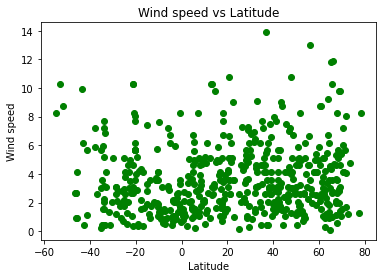

In [22]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"], marker="o", color="green")
plt.title("Wind speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.savefig('../Untitled Folder/wind_lat.png')
plt.show()

## Linear Regression

In [23]:
north = clean_city_data.loc[(clean_city_data["Lat"] >= 0)]
north
south = clean_city_data.loc[(clean_city_data["Lat"] <= 0)]
south

,City,Country,Max Temp,Date,Cloudiness,Lat,Lng,Wind Speed,Humidity
0,Bluff,NZ,278.71,1619371975,79,-46.6000,168.3333,2.68,84
2,Port Alfred,ZA,294.62,1619371976,98,-33.5906,26.8910,6.88,71
5,Geraldton,AU,289.15,1619371977,3,-28.7667,114.6000,2.57,77
9,New Norfolk,AU,286.48,1619371622,100,-42.7826,147.0587,0.45,81
13,Rikitea,PF,298.55,1619371812,85,-23.1203,-134.9692,2.99,75
...,...,...,...,...,...,...,...,...,...
537,Omboué,GA,299.65,1619372126,28,-1.5746,9.2618,2.69,81
538,Mumbwa,ZM,295.95,1619372126,91,-14.9783,27.0619,3.29,45
539,Moerai,PF,297.65,1619372126,67,-22.4333,-151.3333,4.98,65
541,Sena Madureira,BR,306.56,1619372127,32,-9.0656,-68.6569,1.37,48


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

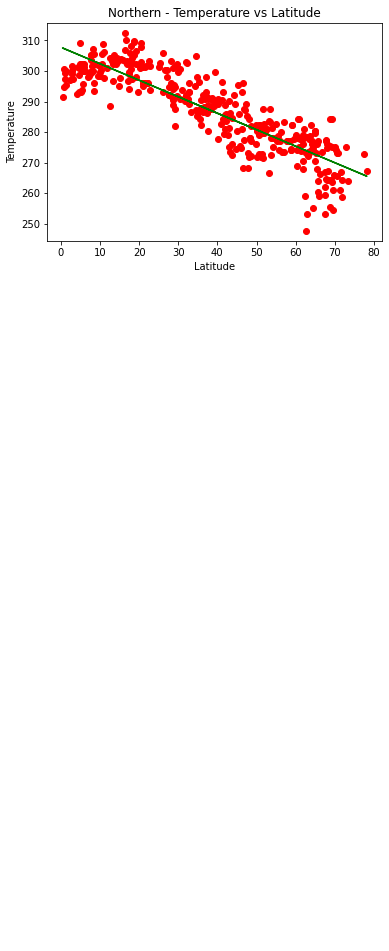

In [24]:
x_values = north["Lat"]
y_values = north["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "red")
plt.plot(x_values,regress_values,"r-",color = "green")
plt.title("Northern - Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.annotate(line_eq,(10,15),fontsize=15,color="green")
plt.savefig('../Untitled Folder/north_temp_lat.png')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

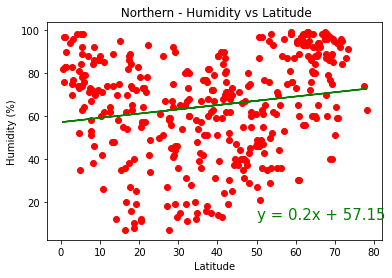

In [25]:

x_values = north["Lat"]
y_values = north["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "red")
plt.plot(x_values,regress_values,"r-",color = "green")
plt.title(" Northern - Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(50,12),fontsize=15,color="green")
plt.savefig('../Untitled Folder/north_hum_lat.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

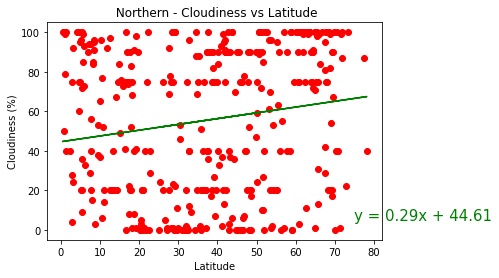

In [26]:
x_values = north["Lat"]
y_values = north["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "red")
plt.plot(x_values,regress_values,"r-",color = "green")
plt.title(" Northern - Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(75,5),fontsize=15,color="green")
plt.savefig('../Untitled Folder/north_cloud_lat.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

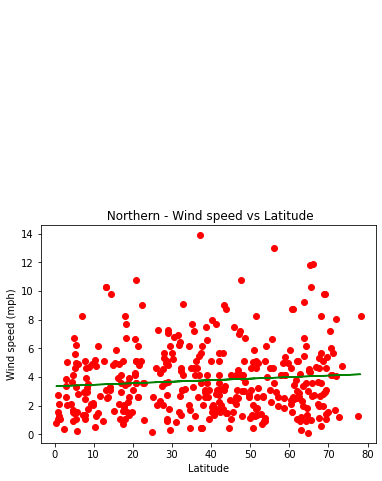

In [27]:
x_values = north["Lat"]
y_values = north["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "red")
plt.plot(x_values,regress_values,"r-",color = "green")
plt.title(" Northern - Wind speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")
plt.annotate(line_eq,(0,29),fontsize=15,color="green")
plt.savefig('../Untitled Folder/north_wind_lat.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

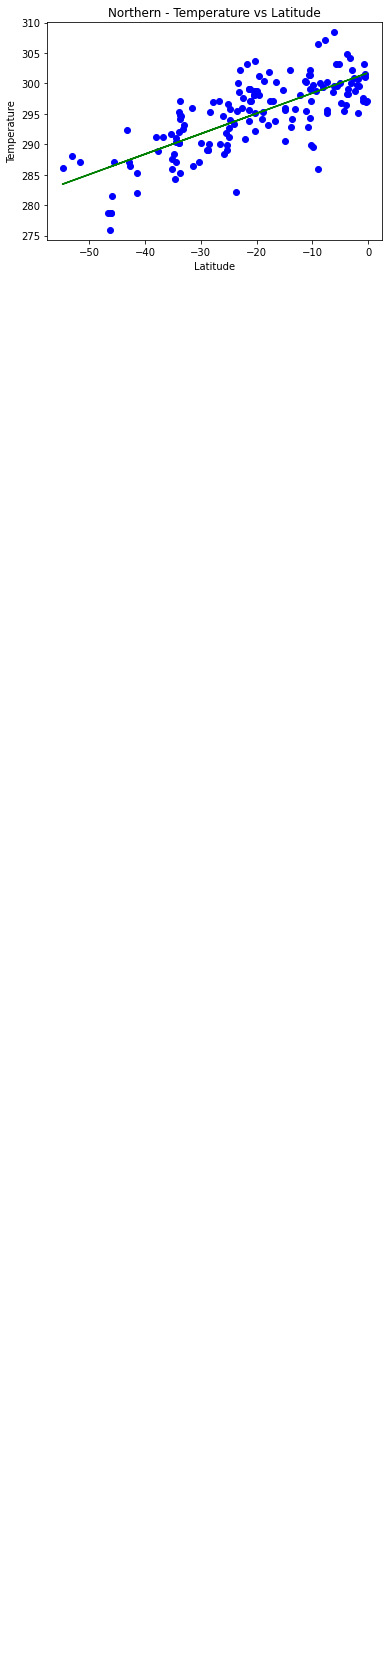

In [28]:
x_values = south["Lat"]
y_values = south["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "blue")
plt.plot(x_values,regress_values,"r-",color="green")
plt.title("Northern - Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.annotate(line_eq,(-25,40),fontsize=15,color="green")
plt.savefig('../Untitled Folder/south_temp_lat.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

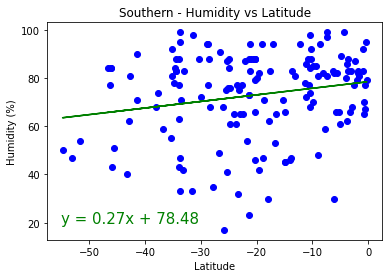

In [29]:
x_values = south["Lat"]
y_values = south["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "blue")
plt.plot(x_values,regress_values,"r-",color="green")
plt.title("Southern - Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(-55,20),fontsize=15,color="green")
plt.savefig('../Untitled Folder/south_hum_lat.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

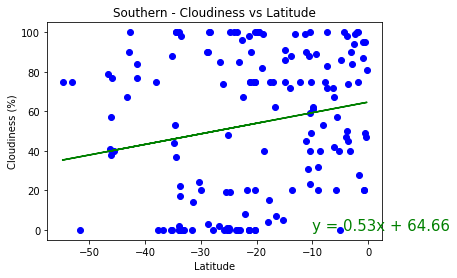

In [30]:
x_values = south["Lat"]
y_values = south["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "blue")
plt.plot(x_values,regress_values,"r-",color="green")
plt.title("Southern - Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(-10,0),fontsize=15,color="green")
plt.savefig('../Untitled Folder/south_cloud_lat.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

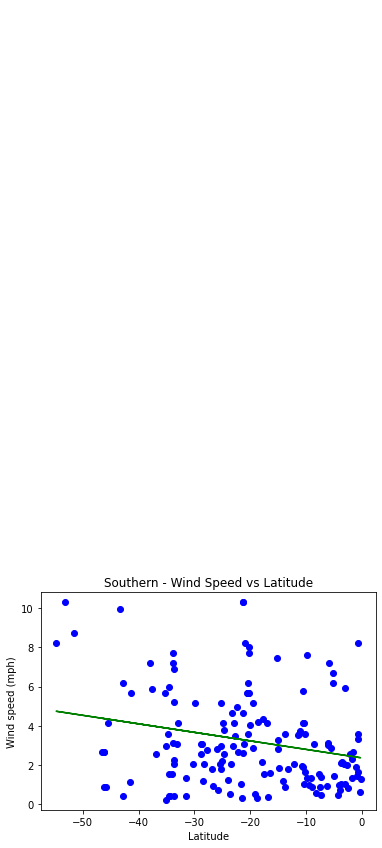

In [31]:
x_values = south["Lat"]
y_values = south["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "blue")
plt.plot(x_values,regress_values,"r-",color="green")
plt.title("Southern - Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")
plt.annotate(line_eq,(-30,40),fontsize=15,color="green")
plt.savefig('../Untitled Folder/south_wind_lat.png')
plt.show()